In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_states = 16
n_actions = 4
goal_state = 15

Q_table = np.zeros((n_states, n_actions))


In [2]:
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
epochs = 1000


In [3]:
def get_next_state(state, action):
    row, col = divmod(state, 4)

    if action == 0 and col > 0:
        col -= 1
    elif action == 1 and col < 3:
        col += 1
    elif action == 2 and row > 0:
        row -= 1
    elif action == 3 and row < 3:
        row += 1

    return row * 4 + col


In [4]:
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)

    while True:
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q_table[current_state])

        next_state = get_next_state(current_state, action)

        reward = 1 if next_state == goal_state else 0

        Q_table[current_state, action] += learning_rate * (
            reward + discount_factor * np.max(Q_table[next_state]) - Q_table[current_state, action]
        )

        if next_state == goal_state:
            break

        current_state = next_state


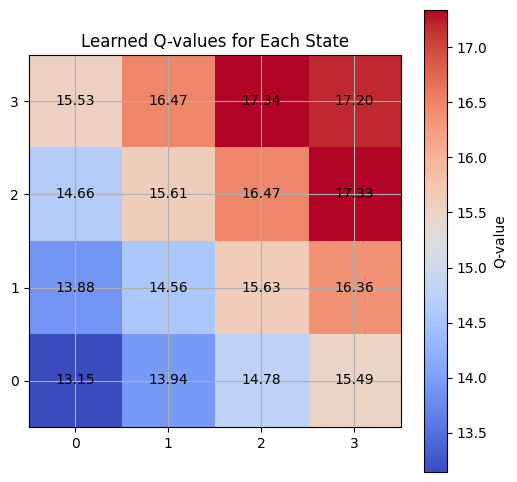

Learned Q-table:
[[10.39923111 12.89567494 10.05864824 13.14621776]
 [ 9.63326881 13.93730604 11.57428547 12.30220311]
 [12.22596242 14.15027087 13.22358875 14.78428434]
 [13.51221399 11.3417668  11.53099149 15.49317935]
 [12.54738267 12.40302609 12.01617085 13.88455143]
 [12.1779478  14.56331594 12.98479894  5.10072995]
 [13.13835464 14.58271886 13.15923786 15.63225609]
 [14.39567447 14.03142209 13.82523443 16.35826742]
 [13.16684167 14.53060123 13.08900167 14.65680467]
 [11.45383239 15.16352246  9.76385123 15.61422984]
 [14.57861577 16.16607083 14.4010944  16.46936857]
 [14.05533391 16.22999432 14.96497742 17.33230169]
 [13.91279053 15.52928988 12.56454737 14.28091257]
 [14.55979058 16.46858444 14.75747994 15.57468979]
 [15.28517532 17.33673483 15.63044501 16.09020654]
 [14.80135339 17.19657052 14.59488697 12.3777602 ]]


In [5]:
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4))

plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for Each State')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()
plt.grid(True)

for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

print("Learned Q-table:")
print(Q_table)
